# Prediction of Obesity Risk

In [4]:
#%pip install matplotlib
#%pip install seaborn
#%pip install pandas
#%pip install sklearn

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading and analyzing data

In [6]:
path_train = 'train.csv'
path_test = 'test.csv'

data_train = pd.read_csv(path_train)
data_test = pd.read_csv(path_test)

In [7]:
data_train.shape

(20758, 18)

In [8]:
data_test.shape

(13840, 17)

In [9]:
data_train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [10]:
data_train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
data_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [12]:
data_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [13]:
data_test.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,27677.500000,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,3995.408198,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,20758.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,24217.750000,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,27677.500000,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,31137.250000,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,34597.000000,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [14]:
# counting number of missing values in the train set
df = pd.DataFrame(data_train)
missing_val_train = df.isnull().sum()

print("Missing values in data :")
print(missing_val_train[missing_val_train > 0])

Missing values in data :
Series([], dtype: int64)


In [15]:
# counting number of missing values in the test set
df_test = pd.DataFrame(data_test)
missing_val_test = df_test.isnull().sum()

print("Missing values in data :")
print(missing_val_test[missing_val_test > 0])

Missing values in data :
Series([], dtype: int64)


In [16]:
# Identifying numerical columns in train set
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


In [17]:
# Show unique values in categorical columns in train set
for column in categorical_cols:
    print(f"Unique values in '{column}': {df[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Frequently' 'no' 'Always']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
Unique values in 'NObeyesdad': ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [18]:
# Identifying numerical columns in test set
numerical_cols_test = df_test.select_dtypes(include=['int64', 'float64']).columns

# Identifying categorical columns in test set
categorical_cols_test = df_test.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", numerical_cols_test)
print("Categorical Columns:", categorical_cols_test)

Numerical Columns: Index(['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')
Categorical Columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [19]:
# Show unique values in categorical columns in test set
for column in categorical_cols_test:
    print(f"Unique values in '{column}': {df_test[column].unique()}")

Unique values in 'Gender': ['Male' 'Female']
Unique values in 'family_history_with_overweight': ['yes' 'no']
Unique values in 'FAVC': ['yes' 'no']
Unique values in 'CAEC': ['Sometimes' 'Always' 'Frequently' 'no']
Unique values in 'SMOKE': ['no' 'yes']
Unique values in 'SCC': ['no' 'yes']
Unique values in 'CALC': ['Sometimes' 'no' 'Frequently' 'Always']
Unique values in 'MTRANS': ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


In [20]:
# Replace categorical values with numerical values in the train set
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df['FAVC'] = df['FAVC'].replace({'yes': 1, 'no': 0})
df['SMOKE'] = df['SMOKE'].replace({'yes': 1, 'no': 0})
df['SCC'] = df['SCC'].replace({'yes': 1, 'no': 0})
df['CAEC'] = df['CAEC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df['CALC'] = df['CALC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df['MTRANS'] = df['MTRANS'].replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Bike': 3, 'Motorbike': 4})

# OneHot encoding the gender feature
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df = pd.concat([df, gender_dummies], axis=1)

# Drop the original columns
df.drop('Gender', axis=1, inplace=True)

In [21]:
# Replace categorical values with numerical values in the train set
df_test['family_history_with_overweight'] = df_test['family_history_with_overweight'].replace({'yes': 1, 'no': 0})
df_test['FAVC'] = df_test['FAVC'].replace({'yes': 1, 'no': 0})
df_test['SMOKE'] = df_test['SMOKE'].replace({'yes': 1, 'no': 0})
df_test['SCC'] = df_test['SCC'].replace({'yes': 1, 'no': 0})
df_test['CAEC'] = df_test['CAEC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df_test['CALC'] = df_test['CALC'].replace({'Sometimes':1, 'Always':3, 'Frequently':2, 'no':0})
df_test['MTRANS'] = df_test['MTRANS'].replace({'Public_Transportation': 0, 'Automobile': 1, 'Walking': 2, 'Bike': 3, 'Motorbike': 4})

# OneHot encoding the gender feature
gender_dummies = pd.get_dummies(df_test['Gender'], prefix='Gender')

# Joining the new one-hot encoded columns back to the original DataFrame
df_test = pd.concat([df_test, gender_dummies], axis=1)

# Drop the original columns
df_test.drop('Gender', axis=1, inplace=True)

In [22]:
df.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male
0,0,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1,0,2.763573,0,0.000000,0.976473,1,0,Overweight_Level_II,False,True
1,1,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,1,Normal_Weight,True,False
2,2,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1,0,1.910378,0,0.866045,1.673584,0,0,Insufficient_Weight,True,False
3,3,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1,0,1.674061,0,1.467863,0.780199,1,0,Obesity_Type_III,True,False
4,4,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1,0,1.979848,0,1.967973,0.931721,1,0,Overweight_Level_II,False,True


In [23]:
df_test.head()

,id,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Gender_Female,Gender_Male
0,20758,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1,0,2.825629,0,0.855400,0.000000,1,0,False,True
1,20759,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1,0,3.000000,0,1.000000,0.000000,1,0,True,False
2,20760,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1,0,2.621877,0,0.000000,0.250502,1,0,True,False
3,20761,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1,0,2.786417,0,0.094851,0.000000,1,0,False,True
4,20762,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1,0,2.653531,0,0.000000,0.741069,1,0,True,False


### Exploratory Data Analysis (EDA)

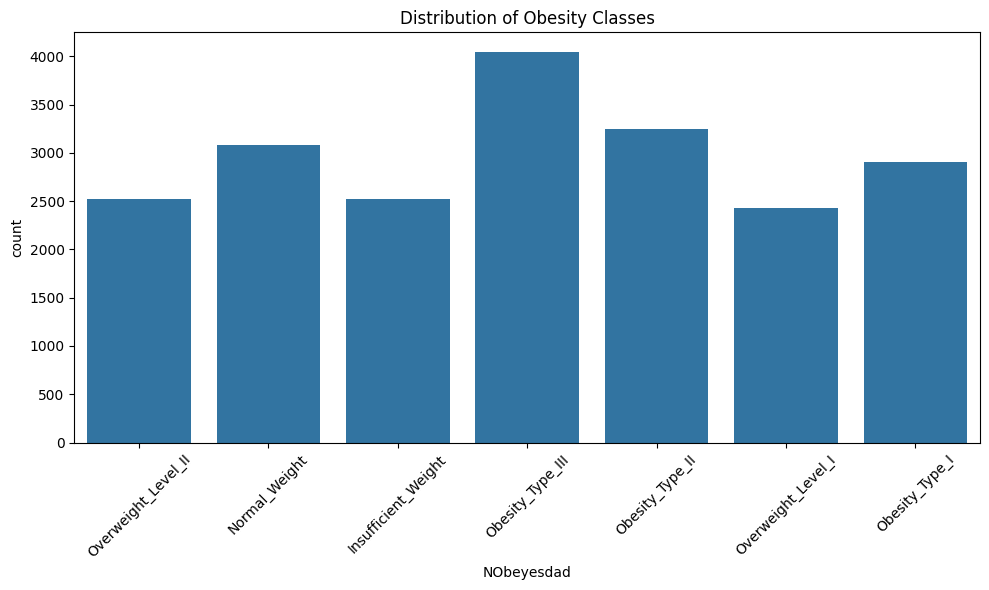

In [24]:
# Count plot for the target variable 'NObeyesdad'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribution of Obesity Classes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

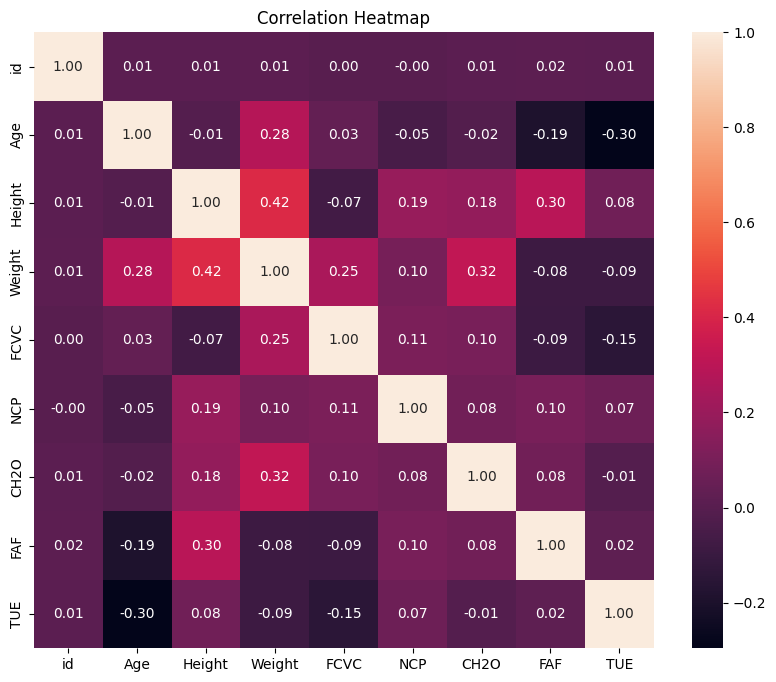

In [25]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Training the model

In [26]:
# Define features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']


# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
accuracy = model.score(X_test, y_test)
accuracy

0.8923410404624278

### Predicting obesity risk

In [28]:
pred = pd.DataFrame()
pred['id']=df_test['id'].astype(int)
pred['NObeyesdad'] = model.predict(df_test)
#pred.to_csv('submission.csv',index=False)
pred

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


## Exporting the model

In [29]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\hchai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
import pickle

In [31]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)